In [233]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np
from sunpy.coordinates import frames
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
flares = pd.read_csv("swpc_event_list.csv")
flares["datetime"] = pd.to_datetime(flares["ts"], format="%Y%m%d%H%M")

In [108]:
flares["datetime"] = pd.to_datetime(flares.datetime)
matchstring = "gev_%Y%m%d_%H%M"
flares["EName"] = flares["datetime"].dt.strftime(matchstring)


In [110]:
flare_pos = pd.read_csv("final_latestevents_scraping.csv")

In [111]:
pos = flare_pos["Derived Position"].replace(np.nan, '', regex=True) \
    + flare_pos["Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength)"].replace(np.nan, '', regex=True)\
    + flare_pos["Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA)"].replace(np.nan, '', regex=True)\
    + flare_pos["Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength)"].replace(np.nan, '', regex=True)

In [112]:
flare_pos["position"] = pos

In [113]:
flare_pos.head(3)

,Event#,EName,Start,Stop,Peak,GOES Class,Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength),Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength),Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA),Derived Position,position
0,2,gev_20100102_0709,2010/01/02 07:09:00,07:40:00,07:24:00,C1.0,S26W41 ( 1039 ),NaN,NaN,NaN,S26W41 ( 1039 )
0,6,gev_20100102_1408,2010/01/02 14:08:00,14:24:00,14:16:00,C2.6,S28W40 ( 1039 ),NaN,NaN,NaN,S28W40 ( 1039 )
0,8,gev_20100102_2257,2010/01/02 22:57:00,23:35:00,23:19:00,C3.1,S27W45 ( 1039 ),NaN,NaN,NaN,S27W45 ( 1039 )


In [114]:
flares_pos = flare_pos.drop(columns=["Derived Position", "Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength)", 
                "Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA)", 
                "Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength)"])

In [115]:
flares_pos.reset_index(inplace=True, drop=True)

In [116]:
leny = []
for i in range(len(flares_pos)):
    leny.append(len(flares_pos["position"][i].split()))

In [117]:
pos_hgs = []
ar_no = []
for i in range(len(flares_pos)):
    aa = flares_pos["position"][i].split()
    if len(aa)==0:
        pos_hgs.append("")
        ar_no.append("")
    elif (len(aa)==1) or (len(aa)==3):
        pos_hgs.append(aa[0])
        ar_no.append("")
    elif len(aa)==4:
        pos_hgs.append(aa[0])
        ar_no.append("1"+aa[2])
    else:
        print("wahh?")

In [118]:
flares_pos["position_hgs"] = pos_hgs
flares_pos["ar_noaanum_latest"] = ar_no

In [119]:
flares_pos = flares_pos.drop(columns="position")

In [129]:
matched = pd.merge(flares, flares_pos, on="EName", how="left")

In [130]:
matched2 = flares.merge(flare_pos, on="EName")

In [131]:
print(len(flares), len(matched))

8606 8606


In [138]:
len(matched[matched["Stop"].isnull()])

292

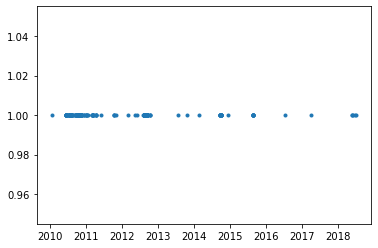

In [146]:
plt.plot(matched[matched["Stop"].isnull()].datetime, np.ones(len(matched[matched["Stop"].isnull()])), marker='.', ls='')

In [153]:
np.sum([matched[matched["Stop"].isnull()]["noaa_ar"].isin(["     "])])

42

In [155]:
matched.head(2)

,date,event_no,start_time,max_time,end_time,goes_sat,goes_channel,goes_class_ind,goes_class,integrated_flux,...,ts,datetime,EName,Event#,Start,Stop,Peak,GOES Class,position_hgs,ar_noaanum_latest
0,20100102,4300,709,0724,740,G14,1-8A,C,C1.0,1.2E-03,...,201001020709,2010-01-02 07:09:00,gev_20100102_0709,2.0,2010/01/02 07:09:00,07:40:00,07:24:00,C1.0,S26W41,11039
1,20100102,4370,1408,1416,1424,G14,1-8A,C,C2.6,1.4E-03,...,201001021408,2010-01-02 14:08:00,gev_20100102_1408,6.0,2010/01/02 14:08:00,14:24:00,14:16:00,C2.6,S28W40,11039


In [154]:
matched.keys()

Index(['date', 'event_no', 'start_time', 'max_time', 'end_time', 'goes_sat',
       'goes_channel', 'goes_class_ind', 'goes_class', 'integrated_flux',
       'noaa_ar', 'ts', 'datetime', 'EName', 'Event#', 'Start', 'Stop', 'Peak',
       'GOES Class', 'position_hgs', 'ar_noaanum_latest'],
      dtype='object')

In [209]:
cols = ["date", "start_time", "max_time", "end_time", "goes_class_ind", "goes_class", "integrated_flux",
        "noaa_ar", "datetime", "Start", "Stop", "Peak", "GOES Class", "position_hgs", "ar_noaanum_latest"]

In [210]:
matched = matched[cols]

In [211]:
def fixy(x):
    if x=="     ":
        return ""
    else:
        return x
matched["noaa_ar"] = matched["noaa_ar"].map(fixy)

In [212]:
test = matched[matched["noaa_ar"]!=matched["ar_noaanum_latest"]]

In [213]:
test.reset_index(inplace=True, drop=True)

In [214]:
lala = []
for i in range(len(test)):
    if len(str(test.iloc[i]["noaa_ar"])) == len(str(test.iloc[i]["ar_noaanum_latest"])):
        print(test.iloc[i][["noaa_ar", "ar_noaanum_latest"]])
        lala.append(test.iloc[i])
lala = pd.DataFrame(lala)

noaa_ar              11149
ar_noaanum_latest    11150
Name: 151, dtype: object
noaa_ar              11160
ar_noaanum_latest    11161
Name: 160, dtype: object
noaa_ar              11161
ar_noaanum_latest    11158
Name: 174, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 189, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 190, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 191, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 193, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 194, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 195, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 197, dtype: object
noaa_ar              11158
ar_noaanum_latest    11162
Name: 198, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 200, dtype: object
noaa_ar              11165
ar_noaanum_latest    1116

noaa_ar              11513
ar_noaanum_latest    11516
Name: 1183, dtype: object
noaa_ar              11513
ar_noaanum_latest    11516
Name: 1184, dtype: object
noaa_ar              11513
ar_noaanum_latest    11516
Name: 1185, dtype: object
noaa_ar              11514
ar_noaanum_latest    11513
Name: 1188, dtype: object
noaa_ar              11515
ar_noaanum_latest    11517
Name: 1190, dtype: object
noaa_ar              11514
ar_noaanum_latest    11513
Name: 1191, dtype: object
noaa_ar              11514
ar_noaanum_latest    11515
Name: 1195, dtype: object
noaa_ar              11514
ar_noaanum_latest    11517
Name: 1196, dtype: object
noaa_ar              11513
ar_noaanum_latest    11515
Name: 1200, dtype: object
noaa_ar              11515
ar_noaanum_latest    11514
Name: 1201, dtype: object
noaa_ar              11519
ar_noaanum_latest    11515
Name: 1220, dtype: object
noaa_ar              11519
ar_noaanum_latest    11515
Name: 1221, dtype: object
noaa_ar              11515
ar_noaanum_la

Name: 1731, dtype: object
noaa_ar              11732
ar_noaanum_latest    11734
Name: 1734, dtype: object
noaa_ar              11733
ar_noaanum_latest    11735
Name: 1737, dtype: object
noaa_ar              11732
ar_noaanum_latest    11734
Name: 1738, dtype: object
noaa_ar              11730
ar_noaanum_latest    11731
Name: 1740, dtype: object
noaa_ar              11731
ar_noaanum_latest    11739
Name: 1741, dtype: object
noaa_ar              11734
ar_noaanum_latest    11739
Name: 1746, dtype: object
noaa_ar              11740
ar_noaanum_latest    11739
Name: 1750, dtype: object
noaa_ar              11736
ar_noaanum_latest    11739
Name: 1751, dtype: object
noaa_ar              11739
ar_noaanum_latest    11738
Name: 1752, dtype: object
noaa_ar              11736
ar_noaanum_latest    11734
Name: 1753, dtype: object
noaa_ar              11736
ar_noaanum_latest    11734
Name: 1754, dtype: object
noaa_ar              11742
ar_noaanum_latest    11734
Name: 1756, dtype: object
noaa_ar       

Name: 1910, dtype: object
noaa_ar              11884
ar_noaanum_latest    11885
Name: 1911, dtype: object
noaa_ar              11889
ar_noaanum_latest    11884
Name: 1912, dtype: object
noaa_ar              11890
ar_noaanum_latest    11892
Name: 1913, dtype: object
noaa_ar              11890
ar_noaanum_latest    11888
Name: 1918, dtype: object
noaa_ar              11887
ar_noaanum_latest    11890
Name: 1925, dtype: object
noaa_ar              11893
ar_noaanum_latest    11895
Name: 1927, dtype: object
noaa_ar              11893
ar_noaanum_latest    11895
Name: 1928, dtype: object
noaa_ar              11894
ar_noaanum_latest    11895
Name: 1929, dtype: object
noaa_ar              11887
ar_noaanum_latest    11895
Name: 1930, dtype: object
noaa_ar              11895
ar_noaanum_latest    11897
Name: 1931, dtype: object
noaa_ar              11895
ar_noaanum_latest    11897
Name: 1932, dtype: object
noaa_ar              11895
ar_noaanum_latest    11897
Name: 1933, dtype: object
noaa_ar       

Name: 2270, dtype: object
noaa_ar              12068
ar_noaanum_latest    12073
Name: 2271, dtype: object
noaa_ar              12065
ar_noaanum_latest    12061
Name: 2272, dtype: object
noaa_ar              12065
ar_noaanum_latest    12066
Name: 2273, dtype: object
noaa_ar              12065
ar_noaanum_latest    12066
Name: 2274, dtype: object
noaa_ar              12065
ar_noaanum_latest    12070
Name: 2275, dtype: object
noaa_ar              12065
ar_noaanum_latest    12061
Name: 2276, dtype: object
noaa_ar              12065
ar_noaanum_latest    12072
Name: 2277, dtype: object
noaa_ar              12065
ar_noaanum_latest    12072
Name: 2278, dtype: object
noaa_ar              12065
ar_noaanum_latest    12072
Name: 2279, dtype: object
noaa_ar              12080
ar_noaanum_latest    12083
Name: 2281, dtype: object
noaa_ar              12085
ar_noaanum_latest    12080
Name: 2283, dtype: object
noaa_ar              12087
ar_noaanum_latest    12092
Name: 2285, dtype: object
noaa_ar       

Name: 2608, dtype: object
noaa_ar              12297
ar_noaanum_latest    12296
Name: 2609, dtype: object
noaa_ar              12302
ar_noaanum_latest    12297
Name: 2623, dtype: object
noaa_ar              12297
ar_noaanum_latest    12302
Name: 2624, dtype: object
noaa_ar              12305
ar_noaanum_latest    12303
Name: 2629, dtype: object
noaa_ar              12305
ar_noaanum_latest    12312
Name: 2630, dtype: object
noaa_ar              12309
ar_noaanum_latest    12308
Name: 2631, dtype: object
noaa_ar              12309
ar_noaanum_latest    12308
Name: 2632, dtype: object
noaa_ar              12309
ar_noaanum_latest    12308
Name: 2633, dtype: object
noaa_ar              12310
ar_noaanum_latest    12305
Name: 2634, dtype: object
noaa_ar              12312
ar_noaanum_latest    12303
Name: 2635, dtype: object
noaa_ar              12303
ar_noaanum_latest    12308
Name: 2636, dtype: object
noaa_ar              12315
ar_noaanum_latest    12303
Name: 2637, dtype: object
noaa_ar       

Name: 2797, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2798, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2799, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2800, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2801, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2803, dtype: object
noaa_ar              12443
ar_noaanum_latest    12442
Name: 2804, dtype: object
noaa_ar              12445
ar_noaanum_latest    12442
Name: 2805, dtype: object
noaa_ar              12443
ar_noaanum_latest    12445
Name: 2806, dtype: object
noaa_ar              12443
ar_noaanum_latest    12442
Name: 2807, dtype: object
noaa_ar              12449
ar_noaanum_latest    12450
Name: 2809, dtype: object
noaa_ar              12454
ar_noaanum_latest    12456
Name: 2812, dtype: object
noaa_ar              12457
ar_noaanum_latest    12454
Name: 2813, dtype: object
noaa_ar       

In [220]:
lala[["datetime", "noaa_ar", "ar_noaanum_latest"]][lala["datetime"]>"2012-01-15 20:00"]

,datetime,noaa_ar,ar_noaanum_latest
906,2012-01-17 17:19:00,11401,11405
907,2012-01-17 18:32:00,11401,11409
908,2012-01-17 23:53:00,11401,11409
909,2012-01-18 10:16:00,11401,11409
913,2012-01-21 20:44:00,11402,11401
...,...,...,...
2924,2017-09-07 22:57:00,12677,12673
2925,2017-09-08 06:24:00,12673,12678
2927,2017-09-09 06:23:00,12673,12676
2928,2017-09-09 07:17:00,12673,12676


## Ok some weird stuff with AR connections, but lets get coordinates

In [222]:
matched["position_hgs"]

0       S26W41
1       S28W40
2       S27W45
3       S28W49
4       S28W63
         ...  
8601       NaN
8602       NaN
8603       NaN
8604       NaN
8605       NaN
Name: position_hgs, Length: 8606, dtype: object

In [245]:
match_dict = {"S": -1, "N": 1, "E":-1, "W":1}
def coord_from_hgs(df):
    if not isinstance(df["position_hgs"], str):
        return np.nan
    else:
        lat = match_dict[df["position_hgs"][0]]*int(df["position_hgs"][1:3])
        lon = match_dict[df["position_hgs"][3]]*int(df["position_hgs"][4:6])
        return SkyCoord(lat*u.deg, lon*u.deg, observer="earth", obstime=df["datetime"],
                        frame=frames.HeliographicStonyhurst)

In [260]:
x[4:6]

'41'

In [273]:
def get_latlon(x):
    try:
        lat = match_dict[x[0]]*int(x[2:3])
        lon = match_dict[x[3]]*int(x[4:6]) 
        return [lat, lon]
    except:
        return [np.nan, np.nan]

In [276]:
lat, lon = matched["position_hgs"].map(get_latlon)

ValueError: too many values to unpack (expected 2)

In [275]:
lat


0         [-6, 41]
1         [-8, 40]
2         [-7, 45]
3         [-8, 49]
4         [-8, 63]
           ...    
8601    [nan, nan]
8602    [nan, nan]
8603    [nan, nan]
8604    [nan, nan]
8605    [nan, nan]
Name: position_hgs, Length: 8606, dtype: object

In [226]:
match_dict["E"]

-1

In [228]:
x = matched["position_hgs"][0]

In [229]:
x

'S26W41'

In [231]:
x[1:3]

'26'

In [232]:
x[4:6]

'41'